In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
x_data = pd.read_csv('/content/drive/MyDrive/Datasets/breast_cancer.data')
xCols = ["Class","Age","Menopause","Tumor-Size","Inv-Nodes","Nodes-Cap","Deg-Malig","Breast","Breast Quad","Irradiate"]
dataframe = pd.DataFrame(x_data)

cols_name = dataframe.columns

dataframe.columns = xCols

dataframe.head()

,Class,Age,Menopause,Tumor-Size,Inv-Nodes,Nodes-Cap,Deg-Malig,Breast,Breast Quad,Irradiate
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
dataframe.dtypes


Class          object
Age            object
Menopause      object
Tumor-Size     object
Inv-Nodes      object
Nodes-Cap      object
Deg-Malig       int64
Breast         object
Breast Quad    object
Irradiate      object
dtype: object

In [ ]:
#drop the tumor size since it will be use to be classified
finalDf = dataframe.drop(columns=['Tumor-Size'])

finalDf.head()

,Class,Age,Menopause,Inv-Nodes,Nodes-Cap,Deg-Malig,Breast,Breast Quad,Irradiate
0,no-recurrence-events,40-49,premeno,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,0-2,no,2,left,left_low,no


In [ ]:
dropped_dupl = finalDf.drop_duplicates()
dropped_dupl

,Class,Age,Menopause,Inv-Nodes,Nodes-Cap,Deg-Malig,Breast,Breast Quad,Irradiate
0,no-recurrence-events,40-49,premeno,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,03-May,no,3,left,left_low,no


In [ ]:
finalDf = dropped_dupl.dropna()
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 284
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        216 non-null    object
 1   Age          216 non-null    object
 2   Menopause    216 non-null    object
 3   Inv-Nodes    216 non-null    object
 4   Nodes-Cap    216 non-null    object
 5   Deg-Malig    216 non-null    int64 
 6   Breast       216 non-null    object
 7   Breast Quad  216 non-null    object
 8   Irradiate    216 non-null    object
dtypes: int64(1), object(8)
memory usage: 16.9+ KB


In [ ]:
finalDf.shape

(216, 9)

In [ ]:
finalDf.isnull().sum()

Class          0
Age            0
Menopause      0
Inv-Nodes      0
Nodes-Cap      0
Deg-Malig      0
Breast         0
Breast Quad    0
Irradiate      0
dtype: int64

In [ ]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        285 non-null    object
 1   Age          285 non-null    object
 2   Menopause    285 non-null    object
 3   Inv-Nodes    285 non-null    object
 4   Nodes-Cap    285 non-null    object
 5   Deg-Malig    285 non-null    int64 
 6   Breast       285 non-null    object
 7   Breast Quad  285 non-null    object
 8   Irradiate    285 non-null    object
dtypes: int64(1), object(8)
memory usage: 20.2+ KB


In [ ]:
finalDf.describe(include="all")


,Class,Age,Menopause,Inv-Nodes,Nodes-Cap,Deg-Malig,Breast,Breast Quad,Irradiate
count,216,216,216,216,216,216.000000,216,216,216
unique,2,6,3,7,3,NaN,2,6,2
top,no-recurrence-events,40-49,premeno,0-2,no,NaN,left,left_low,no
freq,136,68,114,146,155,NaN,110,77,152
mean,NaN,NaN,NaN,NaN,NaN,2.125000,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.745919,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


In [ ]:
X=finalDf.drop(columns=["Class"])
y=finalDf["Class"]
#convert categorical features to numerical features
cat_col=[]#will store categorical features
num_col=[]#will store numerical features

#iterating thourgh all columns in X
for col in X:
    #append the features whose datatype is object in cat_col
    if dataframe[col].dtype=="O":
        cat_col.append(col)
    #append those features whose datatype is other than object in num_col
    else:
        num_col.append(col)

print (cat_col)
print (num_col)

['Age', 'Menopause', 'Inv-Nodes', 'Nodes-Cap', 'Breast', 'Breast Quad', 'Irradiate']
['Deg-Malig']


In [ ]:
#dataframe to store the categorical features
cat=pd.DataFrame(
    data=finalDf,
    #we will use the column names from the cat_col list
    columns= cat_col,
)

#dataframe to store the categorical features
num=pd.DataFrame(
    data=finalDf,
    #we will use the column names from the num_col list
    columns= num_col,
)

In [ ]:
for cols in cat:
    print(cols," contains :",cat[cols].nunique()," labels")

Age  contains : 6  labels
Menopause  contains : 3  labels
Inv-Nodes  contains : 7  labels
Nodes-Cap  contains : 3  labels
Breast  contains : 2  labels
Breast Quad  contains : 6  labels
Irradiate  contains : 2  labels


In [ ]:
s = (finalDf.dtypes =="object")
cols = list(s[s].index)
print("Categorical variables:")
print(cols)

Categorical variables:
['Class', 'Age', 'Menopause', 'Inv-Nodes', 'Nodes-Cap', 'Breast', 'Breast Quad', 'Irradiate']


In [ ]:

label_data = finalDf.copy()

label_encoder = LabelEncoder()
for col in cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,Class,Age,Menopause,Inv-Nodes,Nodes-Cap,Deg-Malig,Breast,Breast Quad,Irradiate
0,0,2,2,0,1,2,1,5,0
1,0,2,2,0,1,2,0,2,0
2,0,4,0,0,1,2,1,3,0
3,0,2,2,0,1,2,1,4,0
4,0,4,0,0,1,2,0,2,0


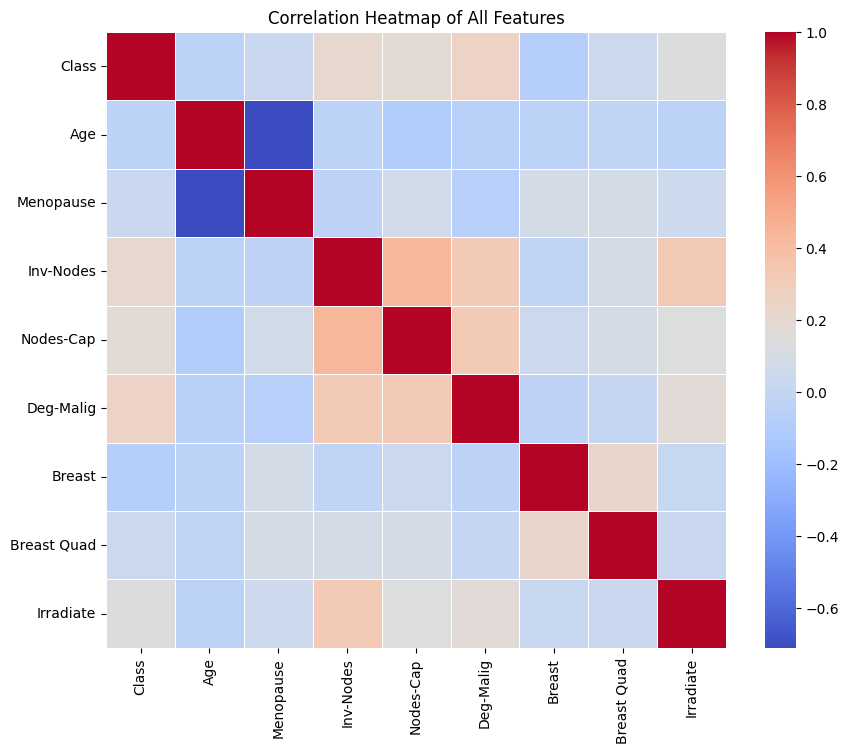

In [ ]:

corr_mat = label_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

                    Model  Accuracy      Feature Selection
0     Logistic Regression  0.522727           All Features
1           Decision Tree  0.568182           All Features
2           Random Forest  0.500000           All Features
3  Support Vector Machine  0.590909           All Features
4     Logistic Regression  0.522727  RFE Selected Features
5           Decision Tree  0.568182  RFE Selected Features
6           Random Forest  0.500000  RFE Selected Features
7  Support Vector Machine  0.590909  RFE Selected Features


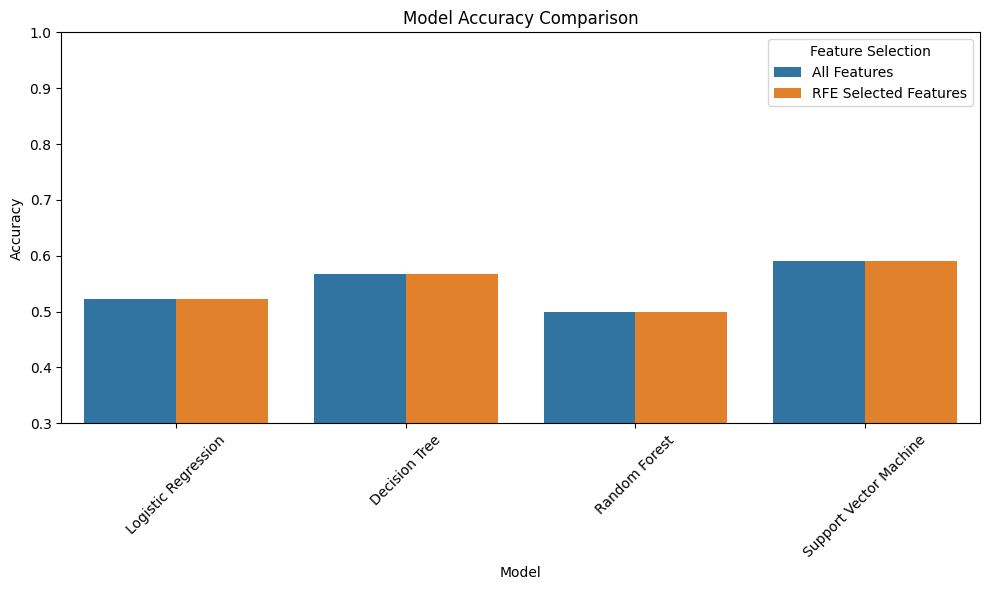

In [ ]:
random_seed = 42

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed)
}

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Plotting
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)

})

print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.3, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()

In [ ]:
# Drop the First
last_column = label_data.columns[0]
X = label_data.drop(last_column, axis=1)
y = label_data[last_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


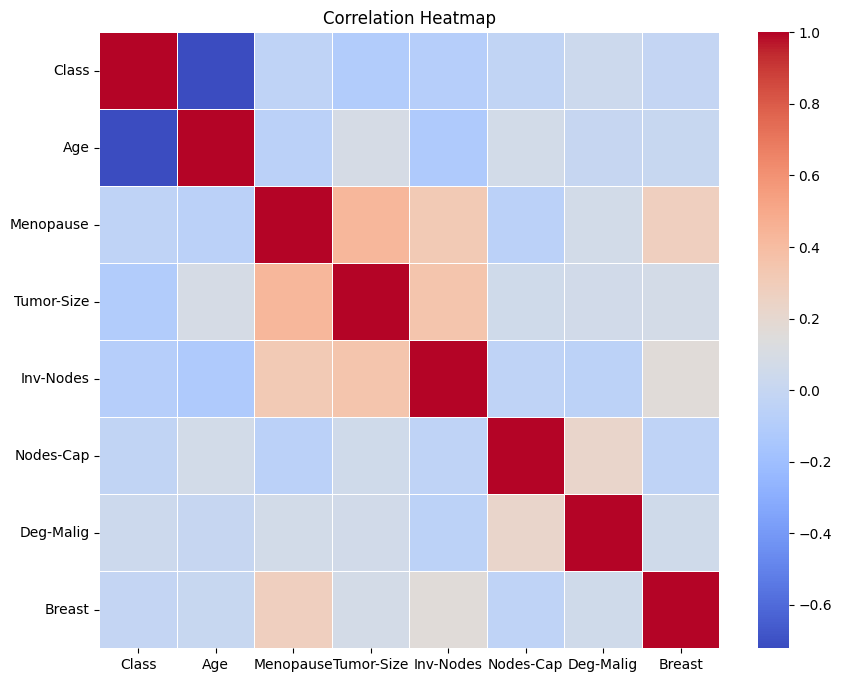

In [ ]:
# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected, columns=[xCols[i] for i, selected in enumerate(rfe.support_) if selected])

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Print scores before RFE
print("Scores with all features and without any added techniques:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Print scores after RFE
print("\nScores with RFE-selected features:")
for name, accuracy in results_rfe_selected_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

Scores with all features and without any added techniques:
Logistic Regression: 52.27%
Decision Tree: 56.82%
Random Forest: 50.00%
Support Vector Machine: 59.09%

Scores with RFE-selected features:
Logistic Regression: 52.27%
Decision Tree: 56.82%
Random Forest: 50.00%
Support Vector Machine: 59.09%


Accuracies without cross validation
Logistic Regression: 0.5227
Decision Tree: 0.5909
Random Forest: 0.5000
Support Vector Machine: 0.5682

Accuracies with cross validation
Logistic Regression: 0.6635
Decision Tree: 0.5756
Random Forest: 0.6225
Support Vector Machine: 0.7096


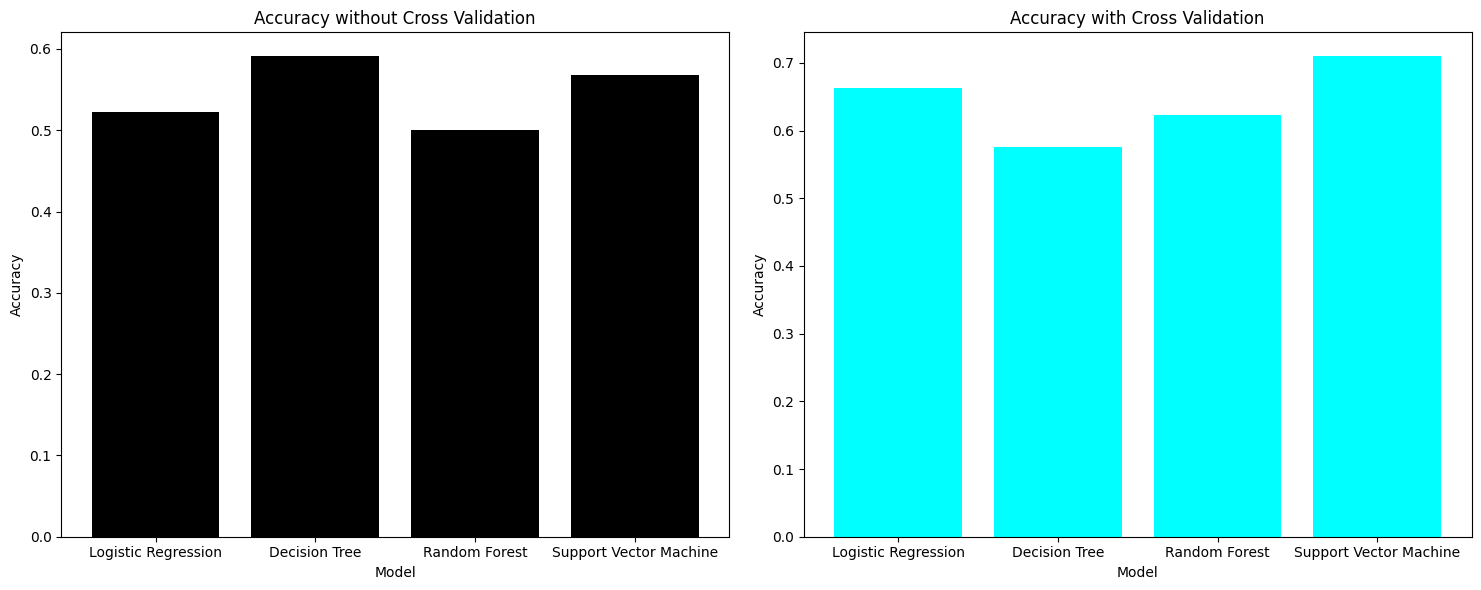

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Results without cross-validation
accuracies_no_cv = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracies_no_cv[name] = model.score(X_test_scaled, y_test)

print("Accuracies without cross validation")
for name, acc in accuracies_no_cv.items():
    print(f"{name}: {acc:.4f}")

# Results with cross-validation
accuracies_cv = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    accuracies_cv[name] = np.mean(cv_scores)

print("\nAccuracies with cross validation")
for name, acc in accuracies_cv.items():
    print(f"{name}: {acc:.4f}")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot without cross-validation
ax[0].bar(accuracies_no_cv.keys(), accuracies_no_cv.values(), color='black')
ax[0].set_title('Accuracy without Cross Validation')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

# Bar plot with cross-validation
ax[1].bar(accuracies_cv.keys(), accuracies_cv.values(), color='cyan')
ax[1].set_title('Accuracy with Cross Validation')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

                    Model  Accuracy      Feature Selection
0     Logistic Regression  0.663529           All Features
1           Decision Tree  0.575630           All Features
2           Random Forest  0.622521           All Features
3  Support Vector Machine  0.709580           All Features
4     Logistic Regression  0.522727  RFE Selected Features
5           Decision Tree  0.568182  RFE Selected Features
6           Random Forest  0.500000  RFE Selected Features
7  Support Vector Machine  0.590909  RFE Selected Features


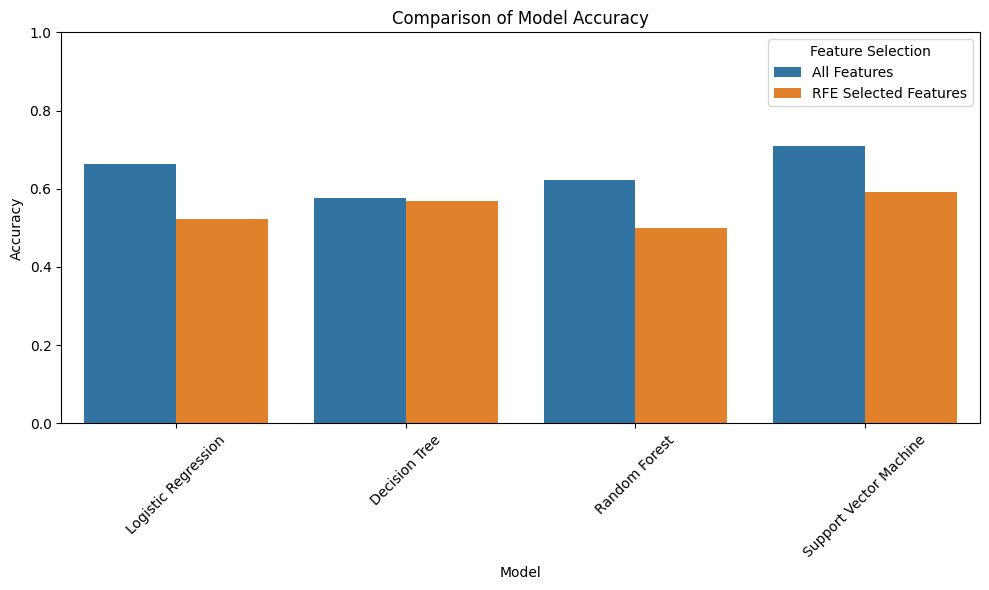

In [ ]:
# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Plotting
results_df = pd.DataFrame({
    "Model": list(accuracies_cv.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(accuracies_cv.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()